<a href="https://colab.research.google.com/github/Atifa14/EDGE-project-09/blob/main/Final_Project09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print ("Atifa")

Atifa


#Data Collection and Storage


In [4]:
import csv

In [7]:
with open("student_data.csv", "w", newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Student ID", "Student Name", "Subject", "Score", "Attendance Percentage", "Assignment Completion"])

In [8]:
def add_record():

  with open("student_data.csv", "a") as file:
      writer = csv.writer(file)


      student_id = input("Enter Student ID : ")
      student_name = input("Enter Student Name: ")
      subject = input("Enter Subject: ")
      score = input("Enter Score: ")
      attendance = input("Enter Attendance Percentage: ")
      assignment = input("Enter Assignment Completion (Yes/No): ")
      writer.writerow([student_id, student_name, subject, score, attendance, assignment])

      file.close()

      print("Data written to student_data.csv")

In [9]:
with open("student_data.csv", "r") as file:
    print(file.read())

Student ID,Student Name,Subject,Score,Attendance Percentage,Assignment Completion



In [11]:
while True:
  print("Menu")
  print("1. Add Record")
  print("2. Search Record")
  print("3. Update Record")
  print("4. Delete Record")
  print("5. Exit")
  choice = input("Enter your choice: (1-5) ")

  if choice == "1":
    add_record()
  if choice == "2":
    search_record()
  if choice == "3":
    update_record()
  if choice == "4":
    delete_record()
  if choice == "5":
    exit()
    break

Menu
1. Add Record
2. Search Record
3. Update Record
4. Delete Record
5. Exit
Enter your choice: (1-5) 1
Enter Student ID : 004
Enter Student Name: Anna
Enter Subject: ENG
Enter Score: 86
Enter Attendance Percentage: 85
Enter Assignment Completion (Yes/No): Yes
Data written to student_data.csv
Menu
1. Add Record
2. Search Record
3. Update Record
4. Delete Record
5. Exit
Enter your choice: (1-5) 1
Enter Student ID : 005
Enter Student Name: Nishat
Enter Subject: OCG
Enter Score: 54
Enter Attendance Percentage: 70
Enter Assignment Completion (Yes/No): No
Data written to student_data.csv
Menu
1. Add Record
2. Search Record
3. Update Record
4. Delete Record
5. Exit
Enter your choice: (1-5) 1
Enter Student ID : 005
Enter Student Name: Nishat
Enter Subject: PHY
Enter Score: 68
Enter Attendance Percentage: 60
Enter Assignment Completion (Yes/No): No
Data written to student_data.csv
Menu
1. Add Record
2. Search Record
3. Update Record
4. Delete Record
5. Exit
Enter your choice: (1-5) 5


#Read CSV

In [5]:
def getinfo(student_id):
  with open("student_data.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
      if row[0] == student_id:
       return row

In [6]:
print(getinfo("001"))

['001', 'Atifa', 'STA', '85', '80', 'Yes']


#Modify Score

In [7]:
def modify_score():
  student_id = input("Enter Student ID to modify: ")
  subject= input("Enter Subject to modify: ")
  with open("student_data.csv", "r") as file:
    reader = csv.reader(file)
    data= list(reader)
    for row in data:
      if row[0] == student_id and row[2] == subject:
        row[3] = input("Enter new score: ")
        break
        print("Subject not found")
        break
  with open("student_data.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(data)
    print("Score modified successfully")

In [8]:
while True:
  print("Menu")
  print("1. Modify Score")
  print("2. Exit")
  choice = input("Enter your choice: (1-2) ")

  if choice == "1":
    modify_score()
  if choice == "2":
    exit()
    break

Menu
1. Modify Score
2. Exit
Enter your choice: (1-2) 1
Enter Student ID to modify: 005
Enter Subject to modify: OCG
Enter new score: 60
Score modified successfully
Menu
1. Modify Score
2. Exit
Enter your choice: (1-2) 2


#Data Analysis and Manipulation

mean,min and max

In [1]:
import pandas as pd

In [2]:
data= pd.read_csv("student_data.csv")

In [3]:
data

,Student ID,Student Name,Subject,Score,Attendance Percentage,Assignment Completion
0,1,Atifa,STA,85,80,Yes
1,1,Atifa,PHY,60,70,No
2,2,Kafi,SWE,80,90,Yes
3,2,Kafi,EEE,86,89,Yes
4,3,Nabisha,BNG,68,65,Yes
5,3,Nabisha,MEE,65,50,No
6,4,Anna,BBA,75,75,Yes
7,4,Anna,ENG,86,85,Yes
8,5,Nishat,OCG,60,70,No
9,5,Nishat,PHY,68,60,No


In [4]:
student_stats= data.groupby(['Student ID','Student Name'])['Score'].agg(['mean', 'max', 'min'])
student_stats = student_stats.rename(columns={
    'mean': 'Average Score',
    'max': 'Highest Score',
    'min': 'Lowest Score'
})
print(student_stats)

                         Average Score  Highest Score  Lowest Score
Student ID Student Name                                            
1          Atifa                  72.5             85            60
2          Kafi                   83.0             86            80
3          Nabisha                66.5             68            65
4          Anna                   80.5             86            75
5          Nishat                 64.0             68            60


Attendence <75% or missing assignments

In [5]:
low_attendence_or_missing_assignments = data[(data['Attendance Percentage'] < 75) | (data['Assignment Completion'] == 'No')]
print(low_attendence_or_missing_assignments)

   Student ID Student Name Subject  Score  Attendance Percentage  \
1           1        Atifa     PHY     60                     70   
4           3      Nabisha     BNG     68                     65   
5           3      Nabisha     MEE     65                     50   
8           5       Nishat     OCG     60                     70   
9           5       Nishat     PHY     68                     60   

  Assignment Completion  
1                    No  
4                   Yes  
5                    No  
8                    No  
9                    No  


Filter students failing a subject

In [8]:
data['Score'] = pd.to_numeric(data['Score'])
failed_students = data[(data['Score'] < 80) & (data['Subject'] == 'OCG')][['Student ID','Student Name','Subject']]
print(failed_students)

   Student ID Student Name Subject
8           5       Nishat     OCG


Convert score to integer

In [9]:
if data['Score'].dtype == 'str':
  print("Score is stored as an string")
  if data['Score'].dtype
    data['Score'] = data['Score'].astype(int)

SyntaxError: expected ':' (<ipython-input-9-32913d20ce61>, line 3)

#Visualization

In [10]:
import matplotlib.pyplot as plt

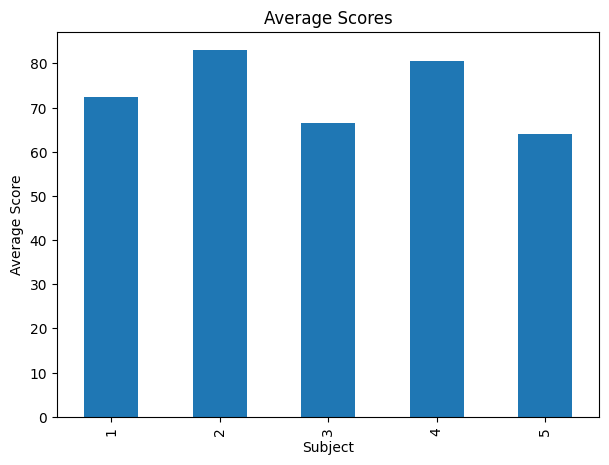

In [11]:
average_scores = data.groupby('Student ID')['Score'].mean()
average_scores.plot(kind='bar', title='Average Scores',figsize=(7,5))
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.show()

Pie chart of attendence

In [12]:
import matplotlib.pyplot as plt

In [13]:
import pandas as pd

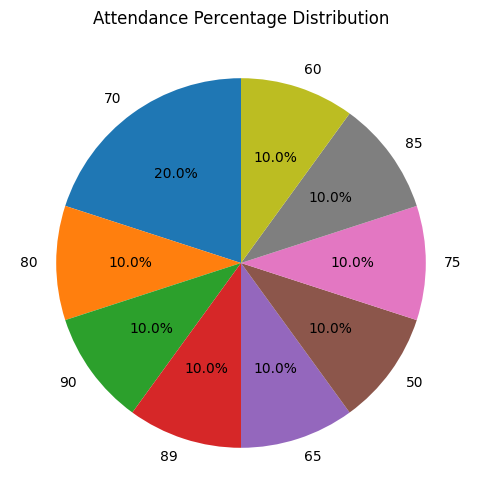

In [15]:
data = pd.read_csv("student_data.csv")
attendance_counts = data["Attendance Percentage"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(attendance_counts, labels=attendance_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Attendance Percentage Distribution")
plt.show()

Creating a line graph

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

Enter the Student ID to visualize: 002


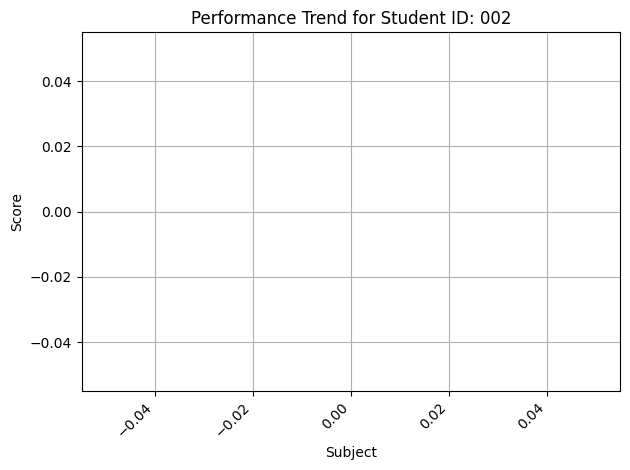

In [18]:
data = pd.read_csv("student_data.csv")
student_id = input("Enter the Student ID to visualize: ")
student_data = data[data['Student ID'] == student_id]
student_data['Score'] = pd.to_numeric(student_data['Score'], errors='coerce')

# Create the line graph
plt.plot(student_data['Subject'], student_data['Score'], marker='o', linestyle='-')

# Customize the graph
plt.title(f"Performance Trend for Student ID: {student_id}")
plt.xlabel("Subject")
plt.ylabel("Score")
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Applying Functions and** **Logic** **bold text**

Calculating aggregate scores for each student

In [20]:
import pandas as pd

In [21]:
data = pd.read_csv("student_data.csv")

In [22]:
student_stats = data.groupby(['Student ID','Student Name'])['Score'].agg(['mean', 'max', 'min'])
student_stats = student_stats.rename(columns={
    'mean': 'Average Score',
    'max': 'Highest Score',
    'min': 'Lowest Score'
})
print(student_stats)

                         Average Score  Highest Score  Lowest Score
Student ID Student Name                                            
1          Atifa                  72.5             85            60
2          Kafi                   83.0             86            80
3          Nabisha                66.5             68            65
4          Anna                   80.5             86            75
5          Nishat                 64.0             68            60


Determining grade (A/B/C/Fail) based on scoring criteria

In [25]:
def assign_grade(score):
       if score >= 85:
           return 'A'
       elif score >= 80:
           return 'B'
       elif score >= 75:
           return 'C'
       else:
           return 'Fail'

In [26]:
data['Grade'] = data['Score'].apply(assign_grade)